### 02_Exploratory_Data_Analysis

Purpose:
 - Read in the reddit posts
 - Look for patterns or pieces to remove
 - Save the cleaned data to hand off to model building

## Imports and notebook settings

In [1]:
# imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import time

In [2]:
# Global options to increase rows and columns displayed
pd.set_option('display.max_columns', None)
# pd.reset_option(“max_columns”) # to reset back to limited columns
pd.set_option("max_rows", None)

## Read in data files and set globals

In [3]:
!ls ../posts

CallOfDuty_4000_2020-05-28_192353.csv callofduty_dnd_final.csv
DnD_4000_2020-05-28_192119.csv


In [4]:
# Read in files full of posts

f_one = '../posts/CallOfDuty_4000_2020-05-28_192353.csv'
f_two = '../posts/DnD_4000_2020-05-28_192119.csv'
subreddit_1 = 'CallOfDuty'
subreddit_2 = 'DnD'   

print(f"subreddit_1 is {subreddit_1}")
print(f"subreddit_2 is {subreddit_2}")

subreddit_1 is CallOfDuty
subreddit_2 is DnD


In [5]:
# Create data frames
df_sub_1 = pd.read_csv(f_one)
df_sub_2 = pd.read_csv(f_two)

# Double check posts
print(df_sub_1['subreddit'].value_counts())
print(df_sub_2['subreddit'].value_counts())

CallOfDuty    4000
Name: subreddit, dtype: int64
DnD    4000
Name: subreddit, dtype: int64


In [6]:
# Compare data amounts
print(f"sub_1 data : {df_sub_1.shape}")
print(f"sub_2 data : {df_sub_2.shape}")
# Before cleaning, there are exactly the same number of posts (4000) from each subredit.

sub_1 data : (4000, 80)
sub_2 data : (4000, 82)


# Explore missing data

In [7]:
# Check columns
df_sub_1.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_template_id', 'link_flair_text', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'suggested_sort',
       'thumbnail', 'tit

### Explore posts flagged as 'banned'

In [8]:
# Explore the 'banned_by', 'mod_reports', and 'user_reports' fields
#     perhaps there will be posts we should drop
if 'banned_by' in df_sub_1.columns:
    print(f"{subreddit_1} banned posts: {df_sub_1['banned_by'].value_counts()}")
else: 
    print(f"{subreddit_1} doesn't include the data for 'banned_by'")
    
if 'banned_by' in df_sub_2.columns:
    print(f"{subreddit_2} banned posts: {df_sub_2['banned_by'].value_counts()}")
else:
    print(f"{subreddit_2} doesn't include the data for 'banned_by'")
# Note: it appears that the 'banned_by' column is only included if the downloaded posts 
#  include some that have been banned.

CallOfDuty banned posts: moderators    33
Name: banned_by, dtype: int64
DnD doesn't include the data for 'banned_by'


In [9]:
if 'banned_by' in df_sub_2.columns:
    df_sub_2.loc[df_sub_2['banned_by']=='moderators',
             ['title','selftext','author','num_comments']].head(2)
# looks like info is deleted; get rid of these

In [10]:
# Keep only posts that were not banned by the moderators

if 'banned_by' in df_sub_1.columns:
    df_sub_1 = df_sub_1[df_sub_1['banned_by']!='moderators']
    print(f"df_sub_1 after drop {df_sub_1.shape}")
    print(f"    df_sub_1: {df_sub_1['banned_by'].value_counts()}")
if 'banned_by' in df_sub_2.columns:
    df_sub_2 = df_sub_2[df_sub_2['banned_by']!='moderators']
    print(f"df_sub_2 after drop  {df_sub_2.shape}")
    print(f"    df_dub_2: {df_sub_2['banned_by'].value_counts()}")

df_sub_1 after drop (3967, 80)
    df_sub_1: Series([], Name: banned_by, dtype: int64)


### Missing or mismatched columns

In [11]:
# Sometimes the fetched data doesn't have all the same columns
superset = set(list(df_sub_1.columns) + list(df_sub_2.columns)) 

cols_to_drop = []

for col in superset:
    if col not in df_sub_1.columns:
        print(f"Not in sub_1:     {col}")
        cols_to_drop.append(col)
    if col not in df_sub_2.columns:
        print(f"Not in sub_2:     {col}")
        cols_to_drop.append(col)
print(f"\nColumns to drop: {cols_to_drop}")

Not in sub_1:     category
Not in sub_1:     content_categories
Not in sub_2:     banned_by
Not in sub_1:     distinguished

Columns to drop: ['category', 'content_categories', 'banned_by', 'distinguished']


In [12]:
# Drop the mismatched columns - since not all have the same columns, also need to
#    set errors to 'ignore'
df_sub_1.drop(columns=cols_to_drop,  inplace=True, errors='ignore')
df_sub_2.drop(columns=cols_to_drop,  inplace=True, errors='ignore')

In [13]:
# Put all data in one dataframe
df_all = df_sub_1.copy()
df_all = df_all.append(df_sub_2)
df_all.shape

(7967, 79)

### Explore missing data

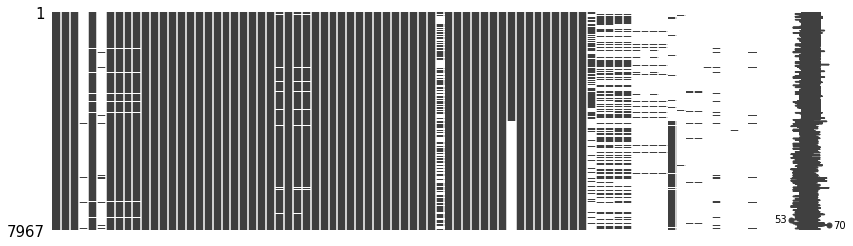

In [14]:
# Visualize missing data
msno.matrix(df_all,figsize=(14,4), fontsize=12);

In [15]:
# Review missing data - uncomment to see the list
#df_all.isnull().sum()

# Key findings:
#     title    -    0 missing
#     selftext - 2576 missing

**Discussion**

 1. There are a large number of columns with no data. After looking over the useful columns, may need to revisit whether anything needs to be imputed. If the column is not needed, then no imputing will be done.

 1. Some posts contain a request for help or 'look at this' in the title and then a screensot or art image. In this case, the key text is already in the title.
 
 1. Some posts contain a generic title such as "Please help" and then the important content is in the body of the message (column 'selftext').
 
DECISION: Combine the title and selftext fields.

In [16]:
# Combine title and body of post
df_all['combo_post'] = df_all.apply(lambda x: str(x['title'])+' '+str(x['selftext']),
                                    axis=1)

### Explore other meta data for the posts

In [17]:
# Explore columns - commented out due to length
#for col in list(df_all.columns):
#    print(f"\n\n{col}:  {df_all[col].value_counts()}")

In [18]:
# Explored these columns in some subreddits; concluded not useful
# df_sub_1['mod_reports'].value_counts()  # nothing useful
# df_sub_1['user_reports'].value_counts() # nothing useful

In [19]:
# Explore contents of other columns 
#      none of these were interesting; they are not in all subreddits
# df_all['spoiler'].value_counts() # all False; no value
# df_all['thumbnail_height'].value_counts() # all ints from ~8 to ~140 ; no apparent value
# df_all['approved_at_utc'].value_counts()  # no value
# df_all['all_awardings'].value_counts() # no value
# df_all['is_video'].value_counts() # 5 are true -- is there any text at all?

In [20]:
# What if it's a video? 
# DECISION: keep title + selftext and it should be ok; 
#  title may be the message and video backs it up
df_all.loc[df_all['is_video'] == True,['author','title','selftext']].head(4) 

,author,title,selftext
6,niklas_owo1,He left right after rip,NaN
15,ItsMeHazzard,SHOTGUN IS ALWAYS FUN TO USE 👀. https://youtu....,NaN
32,DonkeysYuHurdd,Practicing my dropshots. Any tips?,NaN
43,chaoticj3st3r,Parachutes only slow us down,NaN


In [21]:
# Explore for crossposts? Concluded that this column is not useful, 
#   but checking for cross-posts is useful
df_all.groupby('subreddit')['is_crosspostable'].value_counts() 

subreddit   is_crosspostable
CallOfDuty  False               2472
            True                1495
DnD         True                3259
            False                741
Name: is_crosspostable, dtype: int64

In [22]:
# Explore crossposts - unclear if this is different from duplicate postings
df_all['num_crossposts'].value_counts()   # 0 - 2663, 1 - 2 --> what else is in the 2?
df_all.loc[df_all['num_crossposts']==1,['author','title','selftext','subreddit']]  
# DECISION: ignore num_crossposts

,author,title,selftext,subreddit
2252,IronDemon96,[COD] Guess not...,NaN,CallOfDuty
2850,Acdartghoul,[Art] My Bard in a modern 5e campaign! Meet Mr...,NaN,DnD
2973,ProGamerBLT,"[OC] ""Like a mountain I sit. I am immovable, a...",NaN,DnD


In [23]:
# Explore idea of original content
df_all.groupby('subreddit')['is_original_content'].value_counts()

subreddit   is_original_content
CallOfDuty  False                  3886
            True                     81
DnD         False                  3467
            True                    533
Name: is_original_content, dtype: int64

In [24]:
df_all.loc[df_all['is_original_content']==False,
           ['author','title','selftext','subreddit']].head(3)
# Reviewed a few on subreddit; flag doesn't seem useful here

,author,title,selftext,subreddit
0,ant_thomas93,[BO2] got a question,I tried MW2 for ages earlier and couldn’t get ...,CallOfDuty
1,cameronlund08,"[COD] Most Populated COD’s? (XB1, MP)",[removed],CallOfDuty
2,aquang28,Death to the MPLA,NaN,CallOfDuty


In [25]:
# Columns with True/False values - no value for text extraction
df_all.groupby('subreddit')['is_reddit_media_domain'].value_counts()
df_all.groupby('subreddit')['is_robot_indexable'].value_counts()
df_all.groupby('subreddit')['is_self'].value_counts()
df_all.groupby('subreddit')['locked'].value_counts()
df_all.groupby('subreddit')['no_follow'].value_counts()

subreddit   no_follow
CallOfDuty  True         3926
            False          41
DnD         True         3841
            False         159
Name: no_follow, dtype: int64

In [26]:
# Explored; unclear if this has value; revisit if needed
# df_all.groupby('subreddit')['score'].value_counts() 

In [27]:
# Explored; unclear if this has value; revisit if needed
# df_all.groupby('subreddit')['parent_whitelist_status'].value_counts() 

### Search for cross posts and remove

Posts that are made in both threads may or may not belong in either thread, so they will be programmatically removed.

In [28]:
# Optionally view the duplicated posts
#dups = df_all[df_all.duplicated(['combo_post','subreddit'])]
#dups[['combo_post','subreddit']].sort_values(by='combo_post')
# Note that this will only show the duplicates; if you see 2, that means there
#   were actually 3 in the original list

In [29]:
# First, drop duplicates where both combo_post AND subreddit are the same
print(f"Before: {df_all.shape}")
df_all.drop_duplicates(subset=['combo_post','subreddit'],inplace=True)
print(f"After:  {df_all.shape}")

Before: (7967, 80)
After:  (7801, 80)


In [30]:
# Next, look for duplicate posts that could be cross-posted
df_all['combo_post'].value_counts().sort_values(ascending=False).head(10)

Suspicious a player might be cheating This might be long so I will try to be brief, also this is on mobile so please excuse any formatting issues. I am part of a 5 person campaign currently being run through discord just using voice not video. 4/5 of us have rolled character sheets through roll20 and continue to make all rolls through the bot. Our 5th player is rolling his own dice and then reporting his numbers. Each session (so far 8 sessions total) he has gotten at least 3 nat 20s, which while not impossible feels fishy to the rest of us. We’ve brought our concerns up to the DM in passing but he doesn’t want to accuse anyone of cheating. What’s the best way to go about this? Bring the concerns to the DM again and see what he says?                         1
BOOM HEADSHOT! Heli-headshot, rear propeller mince meat. (Sound on). nan                                                                                                                                                              

**Discussion**

Discovery of cross-posts is a key indicator that the 2 groups are not well separated. In the list above, there are no posts that are in both subreddits. (This is good.)

In [31]:
# Drop any duplicates
print(f"Before: {df_all.shape}")
df_all.drop_duplicates(subset='combo_post',inplace=True)
print(f"After:  {df_all.shape}")

Before: (7801, 80)
After:  (7801, 80)


In [32]:
# Check to see if the classes are still balanced -- they are still about 50-50
df_all['subreddit'].value_counts(normalize=True)

DnD           0.502115
CallOfDuty    0.497885
Name: subreddit, dtype: float64

### Explore number of comments

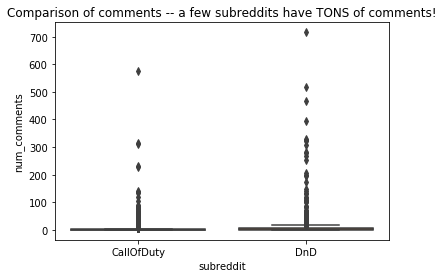

In [33]:
# Explore the number of comments
sns.boxplot(x='subreddit', y='num_comments', data=df_all);
plt.title("Comparison of comments -- a few subreddits have TONS of comments!");
# Interesting but not a concern; I've opted not to include comments in my analysis.

In [34]:
# Compare some stats on the number of comments
df_all.groupby('subreddit')['num_comments'].agg(['min','max','mean'])

,min,max,mean
subreddit,,,
CallOfDuty,0,574,2.661174
DnD,0,716,7.792698


In [35]:
# Explore authors -- are they posting in both subreddits?

posts_in_both = []

subr1_authors = list(df_all.loc[df_all['subreddit']==subreddit_1,'author'].unique())
subr2_authors = list(df_all.loc[df_all['subreddit']==subreddit_2,'author'].unique())

for auth in subr1_authors:
    if auth in subr2_authors:
        posts_in_both.append(auth)
        
print(f"There are {df_all['author'].nunique()} unique authors")
print(f"      and {len(posts_in_both)} authors who post in both subreddits.")

There are 5441 unique authors
      and 2 authors who post in both subreddits.


In [36]:
# Count the posts for each author in each thread
post_count_1 = [df_all[df_all['author']==x].count() for x in df_all.loc[df_all['subreddit']==subreddit_1,
                                                                        'author'].unique()]
posts_in_sub_1 = df_all.loc[df_all['subreddit']==subreddit_1,'author'].count()

post_count_2 = [df_all[df_all['author']==x].count() for x in df_all.loc[df_all['subreddit']==subreddit_2,
                                                                        'author'].unique()]
posts_in_sub_2 = df_all.loc[df_all['subreddit']==subreddit_2,'author'].count()

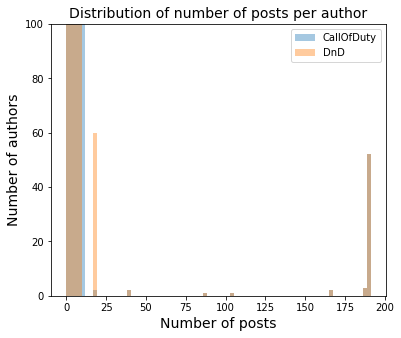

In [37]:
# Explore the number of posts per author, for authors who post more than once
fig = plt.figure(figsize=(6,5))
nbins = 80
sns.distplot(post_count_1,bins=nbins,
             label=subreddit_1,kde=False)
sns.distplot(post_count_2,bins=nbins,
             label=subreddit_2,kde=False)
plt.title('Distribution of number of posts per author',fontsize=14)
plt.legend();
#plt.xlim(0,60)
plt.ylim(0,100)
plt.ylabel('Number of authors',fontsize=14)
plt.xlabel('Number of posts',fontsize=14);

In [38]:
# Do both groups have a similar number of unique authors? (Yes)
df_all.groupby('subreddit')['author'].nunique()  

subreddit
CallOfDuty    2632
DnD           2811
Name: author, dtype: int64

In [39]:
# Average number of posts per author
print(f"{subreddit_1} has {len(subr1_authors)} authors, {posts_in_sub_1} posts, and {posts_in_sub_1/len(post_count_1):.2f} posts per author on average.")
print(f"{subreddit_2} has {len(subr2_authors)} authors, {posts_in_sub_2} posts, and {posts_in_sub_2/len(post_count_2):.2f} posts per author on average.")

CallOfDuty has 2632 authors, 3884 posts, and 1.48 posts per author on average.
DnD has 2811 authors, 3917 posts, and 1.39 posts per author on average.


### Finalize the combined dataframe for the classification

In [40]:
# key columns: subreddit, 'selftext' (main text), 'title'; also num_comments in case that is helpful to a model

In [41]:
# Check dates
cdates = df_all.groupby('subreddit')['created_utc'].agg(['min','max'])

In [42]:
print("Call of Duty posts are from {} through {}".format(\
    time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(cdates.loc['CallOfDuty','min'])),
    time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(cdates.loc['CallOfDuty','max']))))

Call of Duty posts are from 2020-05-12 00:40:33 through 2020-05-28 12:19:22


In [43]:
print("DnD posts are from {} through {}".format(\
    time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(cdates.loc['DnD','min'])),
    time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(cdates.loc['DnD','max']))))

DnD posts are from 2020-05-20 07:47:46 through 2020-05-28 12:19:23


In [44]:
# DECISION: columns to keep (which can be revisited)
keep_columns=['subreddit','author','num_comments','combo_post']

In [45]:
# Now drop everything else
df_all = df_all.loc[:,keep_columns]

In [46]:
# Recheck missing data
df_all.isnull().sum()

subreddit       0
author          0
num_comments    0
combo_post      0
dtype: int64

In [47]:
# Find the larger group programmatically
vc = df_all['subreddit'].value_counts()
vc
if vc[0] > vc[1]:
    make_group_1 = vc.index[0]
    make_group_0 = vc.index[1]
else:
    make_group_1 = vc.index[1]
    make_group_0 = vc.index[0]

In [48]:
# Binarize the target values - larger class gets '1'
df_all['b_subreddit'] = df_all['subreddit'].map({make_group_1:1,make_group_0:0})
print(f"Binarized subreddit is in b_subreddit, with {make_group_1}:1 {make_group_0}:0")

Binarized subreddit is in b_subreddit, with DnD:1 CallOfDuty:0


In [49]:
# Visual check of the class balance
df_all['subreddit'].value_counts(normalize=True)

DnD           0.502115
CallOfDuty    0.497885
Name: subreddit, dtype: float64

In [50]:
# Final check of total posts
df_all.shape

(7801, 5)

## Save to File

In [51]:
fname = "../posts/" + subreddit_1.lower() + '_' + subreddit_2.lower() + '_final.csv'
fname

'../posts/callofduty_dnd_final.csv'

In [52]:
df_all.to_csv(fname,index=False)